<h1 align="center">Take Home Assignment 1</h1>

### Name     :   Sabaragamuwa S.B.N.M.
### Index No :    EG/2018/3443

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import data

In [2]:
# Read the image
image = data.camera()

#### 1. To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

In [3]:
# Get the desired number of intensity levels (in integer powers of 2)
num_levels = int(input('Enter the desired number of intensity levels: '))

In [4]:
def reduce_intensity_levels(image,levels):
    # Calculate the step size
    steps = pow(2,num_levels)-1
    step = 256 // steps

    # Create a new image with the reduced intensity levels
    new_image = image.copy()

    # Iterate through all the pixels
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Get the intensity value of the current pixel
            intensity = image[i, j]
            
            # Reduce the intensity level by dividing by the step size and rounding down
            new_intensity = intensity // step * step
            
            # Set the new intensity value for the current pixel
            new_image[i, j] = new_intensity
    return new_image

<Figure size 640x480 with 0 Axes>

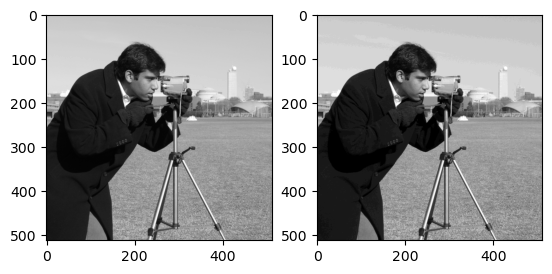

In [5]:
# plot the images
plt.gray()
f,arr=plt.subplots(1,2)
arr[0].imshow(image)
arr[1].imshow(reduce_intensity_levels(image,num_levels))


#### 2. Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood.

In [6]:
# Define the kernel sizes
kernel_sizes = [3, 10, 20]

In [7]:
def average_image(kernel_sizes):
    # Define the figure and axes
    x,arr_1=plt.subplots(1,3,figsize=(12,4))
    i = 0
    # Perform averaging for each kernel size
    for kernel_size in kernel_sizes:
        kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
        filtered_image = cv2.filter2D(image, -1, kernel)
        arr_1[i].imshow(filtered_image)
        i+=1
    i=0

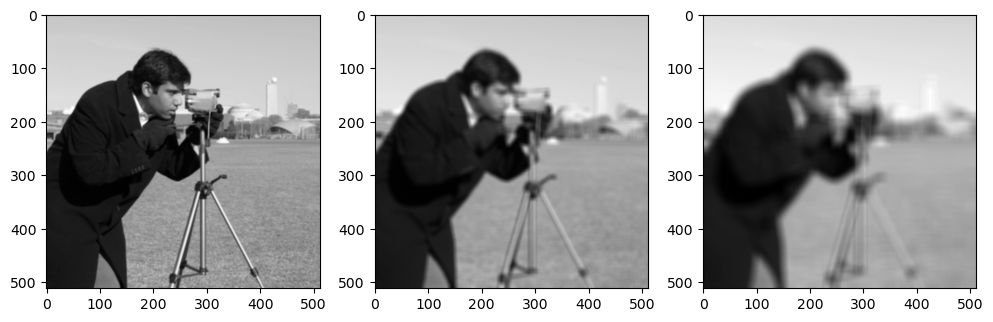

In [8]:
average_image(kernel_sizes)

#### 3. Rotate an image by 45 and 90 degrees.

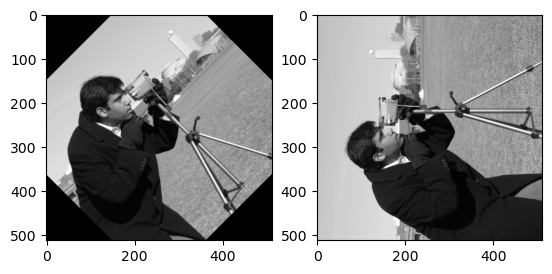

In [9]:
# Get the image dimensions
(h, w) = image.shape[:2]

# Define the rotation angles
angles = [45, 90]
x,arr_1=plt.subplots(1,2)
i = 0
# Perform rotation for each angle
for angle in angles:
    # Calculate the rotation matrix
    M = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1.0)

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, M, (w, h))
    arr_1[i].imshow(rotated_image)
    i+=1
i=0

#### 4. For every 3×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.


In [10]:
# Define the block sizes
block_sizes = [3, 5, 7]

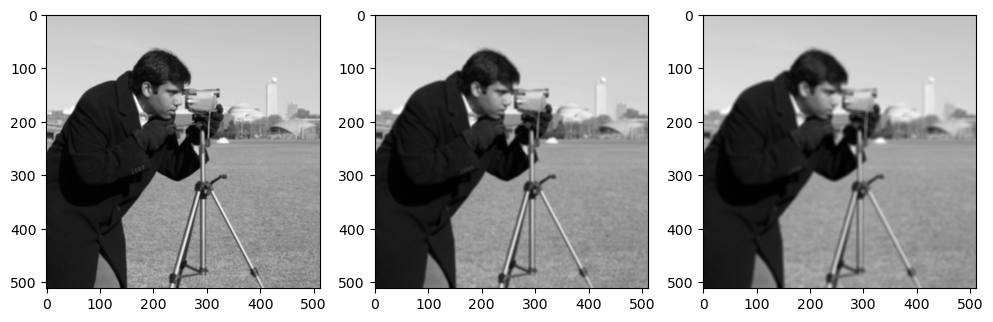

In [11]:
# Define the block sizes
block_sizes = [3, 5, 7]
y,arr_2 =plt.subplots(1,3,figsize=(12,4))
# Perform pooling for each block size
for block_size in block_sizes:
    pooled_image = cv2.blur(image, (block_size, block_size))
    arr_2[i].imshow(pooled_image)
    i+=1